In [1]:
import xgboost as xgb
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings('ignore')

C:\Programs\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
X_with_columns = pd.read_pickle("pickle_files/X.pkl")
Z_with_columns = pd.read_pickle("pickle_files/Z.pkl")

columns_to_drop = []

X_with_columns.drop(columns_to_drop, axis = 1, inplace=True)
Z_with_columns.drop(columns_to_drop, axis = 1, inplace=True)

X = np.array(X_with_columns)
Y = np.array(pd.read_pickle("pickle_files/Y.pkl"))
Z = np.array(Z_with_columns)
df_next_games = pd.read_pickle("pickle_files/next_games.pkl")

In [3]:
kf = KFold(n_splits=4, random_state=0, shuffle=True)
kf.get_n_splits(X)

4

In [4]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

TRAIN: [  0   3   4   6   7   9  11  13  15  16  17  19  20  21  22  23  24  25
  26  28  29  30  32  33  35  36  38  41  42  43  44  45  46  47  51  53
  54  56  57  58  59  60  61  62  63  65  66  67  69  70  72  73  74  78
  80  81  82  83  84  86  87  88  89  90  91  92  93  94  95  96  98  99
 100 102 104 105 106 107 108 109 110 111 112 114 115 117 119 120 121 123
 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 143
 144 146 147 148 149 151 152 153 154 155 158 159 160 161 163 164 165 166
 167 168 169 170 171 173 174 176 177 178 179 180 182 183 184 185 186 187
 188 189 190 191 192 194 195 197 198 199 201 203 205 206 207 208 209 211
 212 213 214 216 217 218 219 220 221 223 224 225 226 227 228 229 232 233
 234 237 238 243 244 245 246 248 250 253 254 256 257 258 259 260 261 262
 264 265 268 269 270 273 274 275 276 277 279 280 281 282 284 286 287 288
 289 290 291 292 293 294 295 296 297 298 300 302 303 304 305 307 308 309
 311 313 314 315 317 321 322 323 324 325 326

## XGBoost

In [5]:
XGB_model = xgb.XGBClassifier(silent=False, 
                      learning_rate=0.005,  
                      colsample_bytree = 0.5,
                      subsample = 0.8,
                      objective='multi:softprob', 
                      n_estimators=1000, 
                      reg_alpha = 60,
                      reg_lambda = .5,
                      max_depth=4, 
                      max_delta_step=3,
                      gamma=5,
                      seed=82)

# add max_delta_step=3  to handle imbalanced class with draws
# max depth was 5. I changed to 4.

In [6]:
eval_set = [(X_train, y_train), (X_test, y_test)]

XGB_model.fit(X_train, y_train, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)
y_pred = XGB_model.predict(X_test)
y_pred_train = XGB_model.predict(X_train)
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)

[06:58:00] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-merror:0.08618	validation_0-mlogloss:1.09504	validation_1-merror:0.08333	validation_1-mlogloss:1.09505
[1]	validation_0-merror:0.08618	validation_0-mlogloss:1.09153	validation_1-merror:0.08333	validation_1-mlogloss:1.09155
[2]	validation_0-merror:0.08618	validation_0-mlogloss:1.08888	validation_1-merror:0.08333	validation_1-mlogloss:1.08891
[3]	validation_0-merror:0.08618	validation_0-mlogloss:1.08541	validation_1-merror:0.08333	validation_1-mlogloss:1.08544
[4]	validation_0-merror:0.08618	validation_0-mlogloss:1.08202	validation_1-merror:0.08333	validation_1-mlogloss:1.08206
[5]	validation_0-merror:0.08618	validation_

[65]	validation_0-merror:0.08618	validation_0-mlogloss:0.92929	validation_1-merror:0.08333	validation_1-mlogloss:0.93008
[66]	validation_0-merror:0.08618	validation_0-mlogloss:0.92687	validation_1-merror:0.08333	validation_1-mlogloss:0.92766
[67]	validation_0-merror:0.08618	validation_0-mlogloss:0.92451	validation_1-merror:0.08333	validation_1-mlogloss:0.92530
[68]	validation_0-merror:0.08618	validation_0-mlogloss:0.92217	validation_1-merror:0.08333	validation_1-mlogloss:0.92297
[69]	validation_0-merror:0.08618	validation_0-mlogloss:0.92048	validation_1-merror:0.08333	validation_1-mlogloss:0.92130
[70]	validation_0-merror:0.08618	validation_0-mlogloss:0.91804	validation_1-merror:0.08333	validation_1-mlogloss:0.91887
[71]	validation_0-merror:0.08618	validation_0-mlogloss:0.91571	validation_1-merror:0.08333	validation_1-mlogloss:0.91653
[72]	validation_0-merror:0.08618	validation_0-mlogloss:0.91338	validation_1-merror:0.08333	validation_1-mlogloss:0.91419
[73]	validation_0-merror:0.08618

[133]	validation_0-merror:0.08618	validation_0-mlogloss:0.80606	validation_1-merror:0.08333	validation_1-mlogloss:0.80719
[134]	validation_0-merror:0.08618	validation_0-mlogloss:0.80434	validation_1-merror:0.08333	validation_1-mlogloss:0.80547
[135]	validation_0-merror:0.08618	validation_0-mlogloss:0.80376	validation_1-merror:0.08333	validation_1-mlogloss:0.80489
[136]	validation_0-merror:0.08618	validation_0-mlogloss:0.80203	validation_1-merror:0.08333	validation_1-mlogloss:0.80315
[137]	validation_0-merror:0.08618	validation_0-mlogloss:0.80034	validation_1-merror:0.08333	validation_1-mlogloss:0.80147
[138]	validation_0-merror:0.08618	validation_0-mlogloss:0.79973	validation_1-merror:0.08333	validation_1-mlogloss:0.80088
[139]	validation_0-merror:0.08618	validation_0-mlogloss:0.79862	validation_1-merror:0.08333	validation_1-mlogloss:0.79979
[140]	validation_0-merror:0.08618	validation_0-mlogloss:0.79699	validation_1-merror:0.08333	validation_1-mlogloss:0.79816
[141]	validation_0-merro

[201]	validation_0-merror:0.08618	validation_0-mlogloss:0.72625	validation_1-merror:0.08333	validation_1-mlogloss:0.72781
[202]	validation_0-merror:0.08618	validation_0-mlogloss:0.72536	validation_1-merror:0.08333	validation_1-mlogloss:0.72690
[203]	validation_0-merror:0.08618	validation_0-mlogloss:0.72407	validation_1-merror:0.08333	validation_1-mlogloss:0.72560
[204]	validation_0-merror:0.08618	validation_0-mlogloss:0.72277	validation_1-merror:0.08333	validation_1-mlogloss:0.72430
[205]	validation_0-merror:0.08618	validation_0-mlogloss:0.72153	validation_1-merror:0.08333	validation_1-mlogloss:0.72307
[206]	validation_0-merror:0.08618	validation_0-mlogloss:0.72067	validation_1-merror:0.08333	validation_1-mlogloss:0.72222
[207]	validation_0-merror:0.08618	validation_0-mlogloss:0.71984	validation_1-merror:0.08333	validation_1-mlogloss:0.72141
[208]	validation_0-merror:0.08618	validation_0-mlogloss:0.71858	validation_1-merror:0.08333	validation_1-mlogloss:0.72015
[209]	validation_0-merro

[269]	validation_0-merror:0.08618	validation_0-mlogloss:0.66298	validation_1-merror:0.08333	validation_1-mlogloss:0.66458
[270]	validation_0-merror:0.08618	validation_0-mlogloss:0.66200	validation_1-merror:0.08333	validation_1-mlogloss:0.66360
[271]	validation_0-merror:0.08618	validation_0-mlogloss:0.66172	validation_1-merror:0.08333	validation_1-mlogloss:0.66333
[272]	validation_0-merror:0.08618	validation_0-mlogloss:0.66076	validation_1-merror:0.08333	validation_1-mlogloss:0.66237
[273]	validation_0-merror:0.08618	validation_0-mlogloss:0.65985	validation_1-merror:0.08333	validation_1-mlogloss:0.66146
[274]	validation_0-merror:0.08618	validation_0-mlogloss:0.65891	validation_1-merror:0.08333	validation_1-mlogloss:0.66052
[275]	validation_0-merror:0.08618	validation_0-mlogloss:0.65799	validation_1-merror:0.08333	validation_1-mlogloss:0.65960
[276]	validation_0-merror:0.08618	validation_0-mlogloss:0.65742	validation_1-merror:0.08333	validation_1-mlogloss:0.65902
[277]	validation_0-merro

[337]	validation_0-merror:0.08618	validation_0-mlogloss:0.61341	validation_1-merror:0.08333	validation_1-mlogloss:0.61496
[338]	validation_0-merror:0.08618	validation_0-mlogloss:0.61320	validation_1-merror:0.08333	validation_1-mlogloss:0.61476
[339]	validation_0-merror:0.08618	validation_0-mlogloss:0.61247	validation_1-merror:0.08333	validation_1-mlogloss:0.61403
[340]	validation_0-merror:0.08618	validation_0-mlogloss:0.61198	validation_1-merror:0.08333	validation_1-mlogloss:0.61354
[341]	validation_0-merror:0.08618	validation_0-mlogloss:0.61161	validation_1-merror:0.08333	validation_1-mlogloss:0.61319
[342]	validation_0-merror:0.08618	validation_0-mlogloss:0.61147	validation_1-merror:0.08333	validation_1-mlogloss:0.61304
[343]	validation_0-merror:0.08618	validation_0-mlogloss:0.61076	validation_1-merror:0.08333	validation_1-mlogloss:0.61233
[344]	validation_0-merror:0.08618	validation_0-mlogloss:0.61009	validation_1-merror:0.08333	validation_1-mlogloss:0.61166
[345]	validation_0-merro

[405]	validation_0-merror:0.08618	validation_0-mlogloss:0.57923	validation_1-merror:0.08333	validation_1-mlogloss:0.58075
[406]	validation_0-merror:0.08618	validation_0-mlogloss:0.57892	validation_1-merror:0.08333	validation_1-mlogloss:0.58044
[407]	validation_0-merror:0.08618	validation_0-mlogloss:0.57863	validation_1-merror:0.08333	validation_1-mlogloss:0.58016
[408]	validation_0-merror:0.08618	validation_0-mlogloss:0.57807	validation_1-merror:0.08333	validation_1-mlogloss:0.57960
[409]	validation_0-merror:0.08618	validation_0-mlogloss:0.57754	validation_1-merror:0.08333	validation_1-mlogloss:0.57907
[410]	validation_0-merror:0.08618	validation_0-mlogloss:0.57696	validation_1-merror:0.08333	validation_1-mlogloss:0.57849
[411]	validation_0-merror:0.08618	validation_0-mlogloss:0.57661	validation_1-merror:0.08333	validation_1-mlogloss:0.57815
[412]	validation_0-merror:0.08618	validation_0-mlogloss:0.57602	validation_1-merror:0.08333	validation_1-mlogloss:0.57756
[413]	validation_0-merro

[473]	validation_0-merror:0.08618	validation_0-mlogloss:0.55120	validation_1-merror:0.08333	validation_1-mlogloss:0.55271
[474]	validation_0-merror:0.08618	validation_0-mlogloss:0.55075	validation_1-merror:0.08333	validation_1-mlogloss:0.55226
[475]	validation_0-merror:0.08618	validation_0-mlogloss:0.55032	validation_1-merror:0.08333	validation_1-mlogloss:0.55182
[476]	validation_0-merror:0.08618	validation_0-mlogloss:0.54983	validation_1-merror:0.08333	validation_1-mlogloss:0.55132
[477]	validation_0-merror:0.08618	validation_0-mlogloss:0.54961	validation_1-merror:0.08333	validation_1-mlogloss:0.55110
[478]	validation_0-merror:0.08618	validation_0-mlogloss:0.54913	validation_1-merror:0.08333	validation_1-mlogloss:0.55062
[479]	validation_0-merror:0.08618	validation_0-mlogloss:0.54910	validation_1-merror:0.08333	validation_1-mlogloss:0.55059
[480]	validation_0-merror:0.08618	validation_0-mlogloss:0.54885	validation_1-merror:0.08333	validation_1-mlogloss:0.55035
[481]	validation_0-merro

[541]	validation_0-merror:0.08618	validation_0-mlogloss:0.52866	validation_1-merror:0.08333	validation_1-mlogloss:0.52997
[542]	validation_0-merror:0.08618	validation_0-mlogloss:0.52866	validation_1-merror:0.08333	validation_1-mlogloss:0.52997
[543]	validation_0-merror:0.08618	validation_0-mlogloss:0.52866	validation_1-merror:0.08333	validation_1-mlogloss:0.52997
[544]	validation_0-merror:0.08618	validation_0-mlogloss:0.52829	validation_1-merror:0.08333	validation_1-mlogloss:0.52959
[545]	validation_0-merror:0.08618	validation_0-mlogloss:0.52807	validation_1-merror:0.08333	validation_1-mlogloss:0.52938
[546]	validation_0-merror:0.08618	validation_0-mlogloss:0.52767	validation_1-merror:0.08333	validation_1-mlogloss:0.52899
[547]	validation_0-merror:0.08618	validation_0-mlogloss:0.52728	validation_1-merror:0.08333	validation_1-mlogloss:0.52859
[548]	validation_0-merror:0.08618	validation_0-mlogloss:0.52713	validation_1-merror:0.08333	validation_1-mlogloss:0.52843
[549]	validation_0-merro

[609]	validation_0-merror:0.08618	validation_0-mlogloss:0.51034	validation_1-merror:0.08333	validation_1-mlogloss:0.51158
[610]	validation_0-merror:0.08618	validation_0-mlogloss:0.50997	validation_1-merror:0.08333	validation_1-mlogloss:0.51121
[611]	validation_0-merror:0.08618	validation_0-mlogloss:0.50979	validation_1-merror:0.08333	validation_1-mlogloss:0.51104
[612]	validation_0-merror:0.08618	validation_0-mlogloss:0.50946	validation_1-merror:0.08333	validation_1-mlogloss:0.51071
[613]	validation_0-merror:0.08618	validation_0-mlogloss:0.50914	validation_1-merror:0.08333	validation_1-mlogloss:0.51039
[614]	validation_0-merror:0.08618	validation_0-mlogloss:0.50880	validation_1-merror:0.08333	validation_1-mlogloss:0.51005
[615]	validation_0-merror:0.08618	validation_0-mlogloss:0.50869	validation_1-merror:0.08333	validation_1-mlogloss:0.50992
[616]	validation_0-merror:0.08618	validation_0-mlogloss:0.50835	validation_1-merror:0.08333	validation_1-mlogloss:0.50959
[617]	validation_0-merro

[677]	validation_0-merror:0.08618	validation_0-mlogloss:0.49260	validation_1-merror:0.08333	validation_1-mlogloss:0.49380
[678]	validation_0-merror:0.08618	validation_0-mlogloss:0.49247	validation_1-merror:0.08333	validation_1-mlogloss:0.49367
[679]	validation_0-merror:0.08618	validation_0-mlogloss:0.49220	validation_1-merror:0.08333	validation_1-mlogloss:0.49339
[680]	validation_0-merror:0.08618	validation_0-mlogloss:0.49191	validation_1-merror:0.08333	validation_1-mlogloss:0.49310
[681]	validation_0-merror:0.08618	validation_0-mlogloss:0.49168	validation_1-merror:0.08333	validation_1-mlogloss:0.49287
[682]	validation_0-merror:0.08618	validation_0-mlogloss:0.49141	validation_1-merror:0.08333	validation_1-mlogloss:0.49260
[683]	validation_0-merror:0.08618	validation_0-mlogloss:0.49113	validation_1-merror:0.08333	validation_1-mlogloss:0.49232
[684]	validation_0-merror:0.08618	validation_0-mlogloss:0.49084	validation_1-merror:0.08333	validation_1-mlogloss:0.49202
[685]	validation_0-merro

[745]	validation_0-merror:0.08618	validation_0-mlogloss:0.47968	validation_1-merror:0.08333	validation_1-mlogloss:0.48075
[746]	validation_0-merror:0.08618	validation_0-mlogloss:0.47943	validation_1-merror:0.08333	validation_1-mlogloss:0.48050
[747]	validation_0-merror:0.08618	validation_0-mlogloss:0.47920	validation_1-merror:0.08333	validation_1-mlogloss:0.48026
[748]	validation_0-merror:0.08618	validation_0-mlogloss:0.47909	validation_1-merror:0.08333	validation_1-mlogloss:0.48015
[749]	validation_0-merror:0.08618	validation_0-mlogloss:0.47885	validation_1-merror:0.08333	validation_1-mlogloss:0.47991
[750]	validation_0-merror:0.08618	validation_0-mlogloss:0.47871	validation_1-merror:0.08333	validation_1-mlogloss:0.47978
[751]	validation_0-merror:0.08618	validation_0-mlogloss:0.47845	validation_1-merror:0.08333	validation_1-mlogloss:0.47952
[752]	validation_0-merror:0.08618	validation_0-mlogloss:0.47823	validation_1-merror:0.08333	validation_1-mlogloss:0.47930
[753]	validation_0-merro

[813]	validation_0-merror:0.08618	validation_0-mlogloss:0.46784	validation_1-merror:0.08333	validation_1-mlogloss:0.46885
[814]	validation_0-merror:0.08618	validation_0-mlogloss:0.46784	validation_1-merror:0.08333	validation_1-mlogloss:0.46885
[815]	validation_0-merror:0.08618	validation_0-mlogloss:0.46774	validation_1-merror:0.08333	validation_1-mlogloss:0.46874
[816]	validation_0-merror:0.08618	validation_0-mlogloss:0.46749	validation_1-merror:0.08333	validation_1-mlogloss:0.46849
[817]	validation_0-merror:0.08618	validation_0-mlogloss:0.46728	validation_1-merror:0.08333	validation_1-mlogloss:0.46828
[818]	validation_0-merror:0.08618	validation_0-mlogloss:0.46715	validation_1-merror:0.08333	validation_1-mlogloss:0.46816
[819]	validation_0-merror:0.08618	validation_0-mlogloss:0.46706	validation_1-merror:0.08333	validation_1-mlogloss:0.46805
[820]	validation_0-merror:0.08618	validation_0-mlogloss:0.46706	validation_1-merror:0.08333	validation_1-mlogloss:0.46805
[821]	validation_0-merro

[881]	validation_0-merror:0.08618	validation_0-mlogloss:0.45702	validation_1-merror:0.08333	validation_1-mlogloss:0.45794
[882]	validation_0-merror:0.08618	validation_0-mlogloss:0.45693	validation_1-merror:0.08333	validation_1-mlogloss:0.45785
[883]	validation_0-merror:0.08618	validation_0-mlogloss:0.45685	validation_1-merror:0.08333	validation_1-mlogloss:0.45776
[884]	validation_0-merror:0.08618	validation_0-mlogloss:0.45675	validation_1-merror:0.08333	validation_1-mlogloss:0.45765
[885]	validation_0-merror:0.08618	validation_0-mlogloss:0.45661	validation_1-merror:0.08333	validation_1-mlogloss:0.45752
[886]	validation_0-merror:0.08618	validation_0-mlogloss:0.45646	validation_1-merror:0.08333	validation_1-mlogloss:0.45736
[887]	validation_0-merror:0.08618	validation_0-mlogloss:0.45625	validation_1-merror:0.08333	validation_1-mlogloss:0.45715
[888]	validation_0-merror:0.08618	validation_0-mlogloss:0.45615	validation_1-merror:0.08333	validation_1-mlogloss:0.45705
[889]	validation_0-merro

[949]	validation_0-merror:0.08618	validation_0-mlogloss:0.44785	validation_1-merror:0.08333	validation_1-mlogloss:0.44875
[950]	validation_0-merror:0.08618	validation_0-mlogloss:0.44769	validation_1-merror:0.08333	validation_1-mlogloss:0.44858
[951]	validation_0-merror:0.08618	validation_0-mlogloss:0.44763	validation_1-merror:0.08333	validation_1-mlogloss:0.44852
[952]	validation_0-merror:0.08618	validation_0-mlogloss:0.44754	validation_1-merror:0.08333	validation_1-mlogloss:0.44844
[953]	validation_0-merror:0.08618	validation_0-mlogloss:0.44748	validation_1-merror:0.08333	validation_1-mlogloss:0.44837
[954]	validation_0-merror:0.08618	validation_0-mlogloss:0.44731	validation_1-merror:0.08333	validation_1-mlogloss:0.44820
[955]	validation_0-merror:0.08618	validation_0-mlogloss:0.44731	validation_1-merror:0.08333	validation_1-mlogloss:0.44820
[956]	validation_0-merror:0.08618	validation_0-mlogloss:0.44725	validation_1-merror:0.08333	validation_1-mlogloss:0.44813
[957]	validation_0-merro

In [7]:
y_pred.shape

(204,)

In [8]:
pd.Series(y_pred).value_counts()

3.0    116
1.0     88
dtype: int64

## LogisticRegression

In [9]:
LR = LogisticRegression(random_state = 42)
LR.fit(X_train, y_train)
LR_y_pred = LR.predict(X_test)
LR_y_pred_train = LR.predict(X_train)
LR_accuracy = accuracy_score(y_test, LR_y_pred)
LR_accuracy_train = accuracy_score(y_train, LR_y_pred_train)

In [10]:
pd.Series(LR_y_pred).value_counts()

3.0    108
1.0     96
dtype: int64

## Comparison

In [11]:
print("XGB train Accuracy: %.2f%%" % (accuracy_train * 100.0))
print("XGB Accuracy: %.2f%%" % (accuracy * 100.0))
print("LR train Accuracy: %.2f%%" % (LR_accuracy_train * 100.0))
print("LR Accuracy: %.2f%%" % (LR_accuracy * 100.0))

XGB train Accuracy: 91.38%
XGB Accuracy: 91.67%
LR train Accuracy: 89.59%
LR Accuracy: 87.25%


In [12]:
features_names = list(X_with_columns.columns)

In [13]:
importance = np.round(XGB_model.feature_importances_,4)
dictionary = dict(zip(features_names, importance))
sorted_dictionary=sorted(dictionary.items(), key=lambda x:x[1], reverse=True)
names=[]
values=[]
for i in range(0, len(importance)):
    print('Feature Importance: {:35} {}%'.format(
        sorted_dictionary[i][0], np.round(sorted_dictionary[i][1]*100,4))
         )
    names.append(sorted_dictionary[i][0])
    values.append(np.round(sorted_dictionary[i][1]*100,4))

Feature Importance: HTGDIFF                             28.5%
Feature Importance: ATGDIFF                             26.92%
Feature Importance: awayTeamScore.minutesInFront        13.69%
Feature Importance: homeTeamScore.minutesInFront        11.39%
Feature Importance: homeTeamScoreChart.goals            5.18%
Feature Importance: awayTeamScore.matchScore.totalScore 5.05%
Feature Importance: homeTeamScore.matchScore.totalScore 4.86%
Feature Importance: awayTeamScoreChart.goals            4.41%
Feature Importance: AVGHTGDIFF                          0.0%
Feature Importance: round.year                          0.0%


In [14]:
cum_values = np.cumsum(values)
values_over_95 = (cum_values > 95).sum()
columns_over_95 = names[-values_over_95:]
columns_over_95

['homeTeamScore.matchScore.totalScore',
 'awayTeamScoreChart.goals',
 'AVGHTGDIFF',
 'round.year']

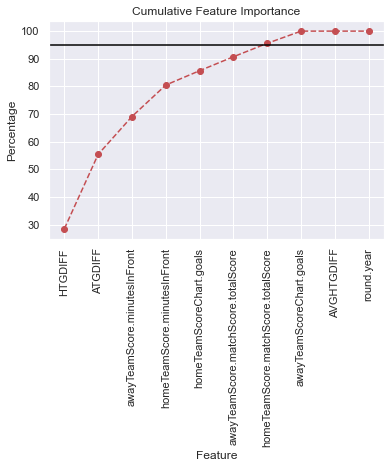

In [15]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
#bottom, top = ylim()
bottom = 0
plt.plot(names,cum_values, '--bo', color='r')
# set importance at 95%
plt.axhline(95,color='black')
plt.xticks(rotation=90);
plt.xlabel('Feature'); 
plt.ylabel('Percentage'); 
plt.title('Cumulative Feature Importance');

In [16]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred, classes, labels,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    classes=classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    #plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             #rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.94117647 0.05882353 0.        ]]


<AxesSubplot:title={'center':'Confusion matrix, with normalization'}, xlabel='Predicted label', ylabel='True label'>

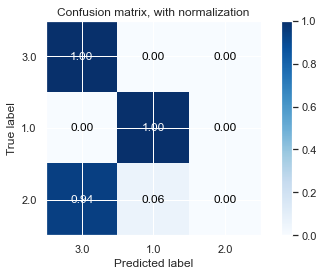

In [17]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=pd.Series(Y).unique(), labels=pd.Series(Y).unique(),
                      title='Confusion matrix, with normalization', normalize=True)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def learning_curve(preds,y_test, model):
    predictions = [round(value) for value in preds]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # retrieve performance metrics
    results = model.evals_result()
    epochs = len(results['validation_0']['merror'])
    x_axis = range(0, epochs)
    # plot log loss
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Log Loss')
    plt.title('XGBoost Log Loss')
    plt.show()
    # plot classification error
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['merror'], label='Train')
    ax.plot(x_axis, results['validation_1']['merror'], label='Test')
    ax.legend()
    plt.ylabel('Classification Error')
    plt.title('XGBoost Classification Error')
    plt.show()

Accuracy: 91.67%


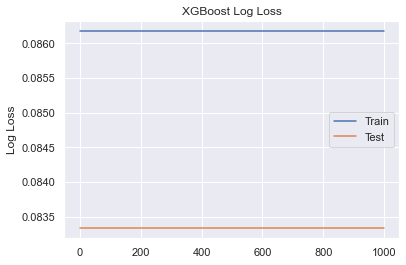

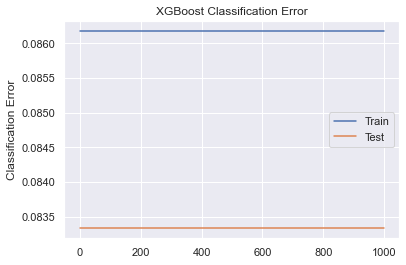

In [19]:
learning_curve(y_pred,y_test,XGB_model)

## Predict Result for Next Games

In [20]:
z_pred = XGB_model.predict(Z)

In [21]:
xgb_df_next_games = df_next_games.copy()

In [22]:
xgb_df_next_games['predicted_result'] = z_pred

In [23]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result
36,Brisbane Lions,Collingwood,3.0
37,North Melbourne,Western Bulldogs,1.0
38,West Coast Eagles,Sydney Swans,1.0
39,St Kilda,Gold Coast Suns,1.0
40,Adelaide Crows,Richmond,3.0
41,Melbourne,GWS Giants,1.0
42,Carlton,Port Adelaide,1.0
43,Essendon,Fremantle,3.0
44,Hawthorn,Geelong Cats,1.0


In [24]:
 z_pred_prob = XGB_model.predict_proba(Z)

In [25]:
xgb_df_next_games['prob_loss'] = z_pred_prob[:,0]
xgb_df_next_games['prob_draw'] = z_pred_prob[:,1]
xgb_df_next_games['prob_win'] = z_pred_prob[:,2]




In [26]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win
36,Brisbane Lions,Collingwood,3.0,0.153442,0.148931,0.697627
37,North Melbourne,Western Bulldogs,1.0,0.640756,0.170808,0.188436
38,West Coast Eagles,Sydney Swans,1.0,0.456738,0.190127,0.353135
39,St Kilda,Gold Coast Suns,1.0,0.456738,0.190127,0.353135
40,Adelaide Crows,Richmond,3.0,0.153442,0.148931,0.697627
41,Melbourne,GWS Giants,1.0,0.456738,0.190127,0.353135
42,Carlton,Port Adelaide,1.0,0.640756,0.170808,0.188436
43,Essendon,Fremantle,3.0,0.153442,0.148931,0.697627
44,Hawthorn,Geelong Cats,1.0,0.640756,0.170808,0.188436


In [27]:

xgb_df_next_games['home_prob_win'] = 0.0

for i in range(len(xgb_df_next_games)):
    if xgb_df_next_games['predicted_result'].values[i] == 3.0:
        xgb_df_next_games['home_prob_win'].values[i] = xgb_df_next_games['prob_win'].values[i]
    elif xgb_df_next_games['predicted_result'].values[i] == 2.0:
        xgb_df_next_games['home_prob_win'].values[i] = 0.5
    elif xgb_df_next_games['predicted_result'].values[i] == 1.0:
        xgb_df_next_games['home_prob_win'].values[i] = 1.0 - xgb_df_next_games['prob_loss'].values[i]

In [28]:
xgb_df_next_games

,match.homeTeam.name,match.awayTeam.name,predicted_result,prob_loss,prob_draw,prob_win,home_prob_win
36,Brisbane Lions,Collingwood,3.0,0.153442,0.148931,0.697627,0.697627
37,North Melbourne,Western Bulldogs,1.0,0.640756,0.170808,0.188436,0.359244
38,West Coast Eagles,Sydney Swans,1.0,0.456738,0.190127,0.353135,0.543262
39,St Kilda,Gold Coast Suns,1.0,0.456738,0.190127,0.353135,0.543262
40,Adelaide Crows,Richmond,3.0,0.153442,0.148931,0.697627,0.697627
41,Melbourne,GWS Giants,1.0,0.456738,0.190127,0.353135,0.543262
42,Carlton,Port Adelaide,1.0,0.640756,0.170808,0.188436,0.359244
43,Essendon,Fremantle,3.0,0.153442,0.148931,0.697627,0.697627
44,Hawthorn,Geelong Cats,1.0,0.640756,0.170808,0.188436,0.359244
